In [41]:
import os
import numpy as np
import tensorflow as tf
from google.cloud import storage
import tempfile
import plotly.express as px
import matplotlib.pyplot as plt

import sys
sys.path.append("..") # Adds higher directory to python modules path.
from drought_detection.data_handling import get_images_gcp, load_imgs_set, load_img


# General workflow:

## For stacked bands

In [ ]:
# Step 1: load image & label, specifying bands
rgb, rgb_label = load_img(file='gs://wagon-data-batch913-drought_detection/data/train/part-r-00004', 
                            bands=['B4', 'B3', 'B2'])

# Step 2: show image
px.imshow(rgb)

## for composite bands

In [18]:
# Step 1: load image & label
img, label = load_img(file='gs://wagon-data-batch913-drought_detection/data/train/part-r-00004', 
                            bands=['B3', 'B5'])

## if doing calculations ##
# Step 1-a: cast to float32 so we can do normal matrix computations (uint8 returns to 0 after 255)
cast_image = tf.cast(img.swapaxes(0, 2), 'float32')

# Step 1-b: calculate composite band (e.g. NDVI)
ndvi = (cast_image[1] - cast_image[0]) / (cast_image[1] + cast_image[0])

# Step 1-c: check min and max values (just to check)
np.array(ndvi).min(), np.array(ndvi).max()

# Step 2: show image
px.imshow(ndvi)

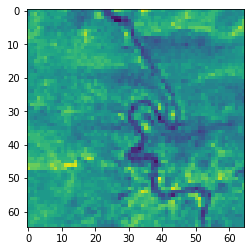

In [23]:
# Step 2: show image another way (with matplotlib)
plt.imshow(ndvi);

# CI bands

In [16]:
# CI
ci_img, ci_label = load_img(file='gs://wagon-data-batch913-drought_detection/data/train/part-r-00004', 
                            bands=['B4', 'B2', 'B1'])

In [17]:
px.imshow(ci_img)

In [37]:
# load all images with CI bands
train_imgs, train_labels = get_images_gcp(n = 5, bands=['B4', 'B2', 'B1'])

In [40]:
# check a random image to make sure the loading worked
px.imshow(train_imgs[2])

## errors with loading from gs link to bucket (ignore)

In [25]:
# load all images with CI bands

ci_images, ci_labels = load_imgs_set(directory='gs://wagon-data-batch913-drought_detection/data/train/', 
                                     n_files=10)

FileNotFoundError: [Errno 2] No such file or directory: 'gs://wagon-data-batch913-drought_detection/data/train'

In [33]:
directory='../raw_data/train/'
files = [file for file in os.listdir(directory) if 'part-' in file]
files

['part-r-00129',
 'part-r-01030',
 'part-r-00116',
 'part-r-01008',
 'part-r-00111',
 'part-r-01037',
 'part-r-00118',
 'part-r-00127',
 'part-r-01001',
 'part-r-01039',
 'part-r-01006',
 'part-r-00120',
 'part-r-00180',
 'part-r-01052',
 'part-r-00174',
 'part-r-01099',
 'part-r-00173',
 'part-r-00187',
 'part-r-01055',
 'part-r-01097',
 'part-r-00145',
 'part-r-01063',
 'part-r-01064',
 'part-r-01090',
 'part-r-00142',
 'part-r-00189',
 'part-r-01038',
 'part-r-00121',
 'part-r-01007',
 'part-r-00119',
 'part-r-01000',
 'part-r-00126',
 'part-r-01009',
 'part-r-01036',
 'part-r-00110',
 'part-r-00128',
 'part-r-00117',
 'part-r-01031',
 'part-r-01091',
 'part-r-00143',
 'part-r-01065',
 'part-r-00188',
 'part-r-01062',
 'part-r-01096',
 'part-r-00144',
 'part-r-00186',
 'part-r-01054',
 'part-r-00172',
 'part-r-00175',
 'part-r-00181',
 'part-r-01053',
 'part-r-01098',
 'part-r-00038',
 'part-r-01121',
 'part-r-00007',
 'part-r-01119',
 'part-r-00000',
 'part-r-01126',
 'part-r-00009

In [35]:
'gs://wagon-data-batch913-drought_detection/data/train/' + files[0]

'gs://wagon-data-batch913-drought_detection/data/train/part-r-00129'

In [32]:
ci_images = []
ci_labels = []

for file in files:
    filename='gs://wagon-data-batch913-drought_detection/data/train/' + file
    ci_img, ci_label = load_img(file=filename, 
                            bands=['B4', 'B2', 'B1'])
    ci_images.append(ci_img)
    ci_labels.append(ci_label)

ci_labels

NotFoundError: Error executing an HTTP request: HTTP response code 404 with body '<?xml version='1.0' encoding='UTF-8'?><Error><Code>NoSuchKey</Code><Message>The specified key does not exist.</Message><Details>No such object: wagon-data-batch913-drought_detection/data/train/p</Details></Error>'
	 when reading gs://wagon-data-batch913-drought_detection/data/train/p [Op:IteratorGetNext]

# NDVI

In [ ]:
# Step 1: load image & label
img, label = load_img(file='gs://wagon-data-batch913-drought_detection/data/train/part-r-00004', 
                            bands=['B3', 'B5'])

## if doing calculations ##
# Step 1-a: cast to float32 so we can do normal matrix computations (uint8 returns to 0 after 255)
cast_image = tf.cast(img.swapaxes(0, 2), 'float32')

# Step 1-b: calculate composite band (e.g. NDVI)
ndvi = (cast_image[1] - cast_image[0]) / (cast_image[1] + cast_image[0])

# Step 1-c: check min and max values (just to check)
np.array(ndvi).min(), np.array(ndvi).max()

# Step 2: show image
px.imshow(ndvi)

In [ ]:
# Show ndvi another way (with matplotlib)
plt.imshow(ndvi);

In [42]:
# Example function to automatically compute NDVI for an image
# here, function could be used in a loop on a list of files
#
# we need to think about how we will want to use the function and at 
# what step of our pipeline -> this will determine what function takes as input

def get_ndvi(image_file):
    '''
    this function computes the ndvi image (2D array of 65x65 pixels) 
    from an satellite image FILE
    
    Parameters:
            image_file (path): filename of image (including path)

    Returns:
            ndvi (list): a 2D (65x65 pixels) arrays of values
            label (int): label
                
    '''
    
    # get image (specify which image file and which bands)
    img, label = load_img(image_file, bands=['B3', 'B5']) # you choose bands here

    # convert to float32, so that we can actually do calculation on matrices
    cast_image = tf.cast(img.swapaxes(0, 2), 'float32')

    # NDVI
    ndvi = (cast_image[1] - cast_image[0]) / (cast_image[1] + cast_image[0])
    
    return ndvi, label


In [44]:
# check if function works
ndvi, ndvi_label = get_ndvi('gs://wagon-data-batch913-drought_detection/data/train/part-r-00004')

# plot image with label
fig = px.imshow(ndvi, title=str(ndvi_label))
fig.show()